In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
from binance.client import Client
from binance import enums
api_key = "Q1g7oGhj38VlnlVwM9gmu6k0Lou6Jt47uZA0fzhjpL5P8tL35m3xs0zogPPzzZ04"
api_secret = "t0rchn61HGNIXEfZ3Qty3EkdI0DDMSfXEo4jPmugzEpzmUFO4FJ5jCmmpXgtP46c"
client = Client(api_key, api_secret)

In [3]:
import cryptoz
from cryptoz import stats, utils, plot

# params

In [4]:
pairs = [
    'BNB/USDT',
    'BTC/USDT',
    'XRP/USDT', 
    'ETH/USDT', 
    'ADA/USDT', 
    'XLM/USDT', 
    'XVG/USDT', 
    'LTC/USDT', 
    'IOTA/USDT', 
    'QTUM/USDT', 
    'NEO/USDT', 
    'DASH/USDT', 
    'ETC/USDT', 
    'LSK/USDT', 
    'XMR/USDT', 
    'OMG/USDT', 
    'STRAT/USDT', 
    'ZEC/USDT',
    'BCC/USDT'
]

In [5]:
interval = enums.KLINE_INTERVAL_1HOUR
display_window = pd.Timedelta(days=3)

# data

In [6]:
from cryptoz.exchanges.binance import Binance
reload(cryptoz.exchanges)

binance = Binance(client)

In [7]:
ohlc = binance.get_ohlc(pairs, interval=interval)

19 pairs:
BNB/USDT.. done
BTC/USDT.. done
XRP/USDT.. using XRP/BTC cross BTC/USDT.. done
ETH/USDT.. done
ADA/USDT.. using ADA/BTC cross BTC/USDT.. done
XLM/USDT.. using XLM/BTC cross BTC/USDT.. done
XVG/USDT.. using XVG/BTC cross BTC/USDT.. done
LTC/USDT.. done
IOTA/USDT.. using IOTA/BTC cross BTC/USDT.. done
QTUM/USDT.. using QTUM/BTC cross BTC/USDT.. done
NEO/USDT.. done
DASH/USDT.. using DASH/BTC cross BTC/USDT.. done
ETC/USDT.. using ETC/BTC cross BTC/USDT.. done
LSK/USDT.. using LSK/BTC cross BTC/USDT.. done
XMR/USDT.. using XMR/BTC cross BTC/USDT.. done
OMG/USDT.. using OMG/BTC cross BTC/USDT.. done
STRAT/USDT.. using STRAT/BTC cross BTC/USDT.. done
ZEC/USDT.. using ZEC/BTC cross BTC/USDT.. done
BCC/USDT.. done


# basics

## price

    count     mean       std       min       25%       50%       75%       max
0  1368.0 -0.11797  0.338124 -0.710851 -0.411436 -0.132254  0.127899  0.768061


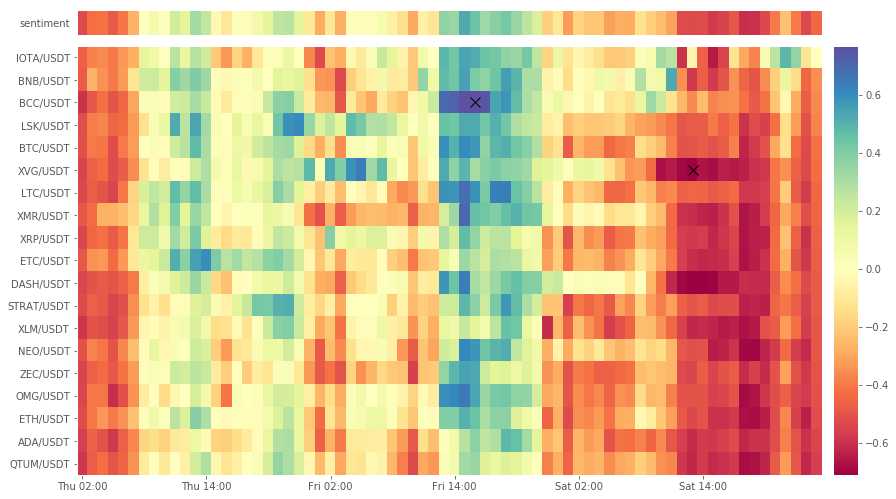

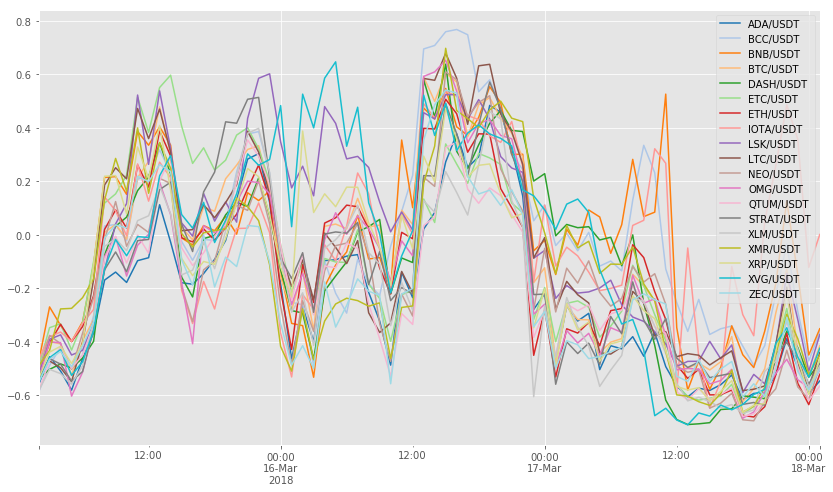

In [8]:
window = 20

df = utils.to_df(ohlc, 'C')
# price relative to mean of previous prices
df = utils.rolling_normalize(df, 'mean', window)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

In [9]:
df = utils.to_df(ohlc, 'C')
df = df.pct_change().dropna()
df.iloc[-1].sort_values()

ADA/USDT     -0.000568
DASH/USDT     0.000891
QTUM/USDT     0.001545
ZEC/USDT      0.003560
XMR/USDT      0.003872
OMG/USDT      0.004783
BNB/USDT      0.005535
STRAT/USDT    0.006237
BTC/USDT      0.006409
XLM/USDT      0.006837
BCC/USDT      0.009858
LSK/USDT      0.009873
ETC/USDT      0.009928
IOTA/USDT     0.010110
LTC/USDT      0.010151
ETH/USDT      0.011731
XRP/USDT      0.012092
XVG/USDT      0.012107
NEO/USDT      0.015125
Name: 2018-03-18 01:00:00, dtype: float64

    count      mean       std      min       25%       50%       75%       max
0  1368.0 -0.001264  0.017264 -0.07644 -0.010578 -0.001179  0.008297  0.067023


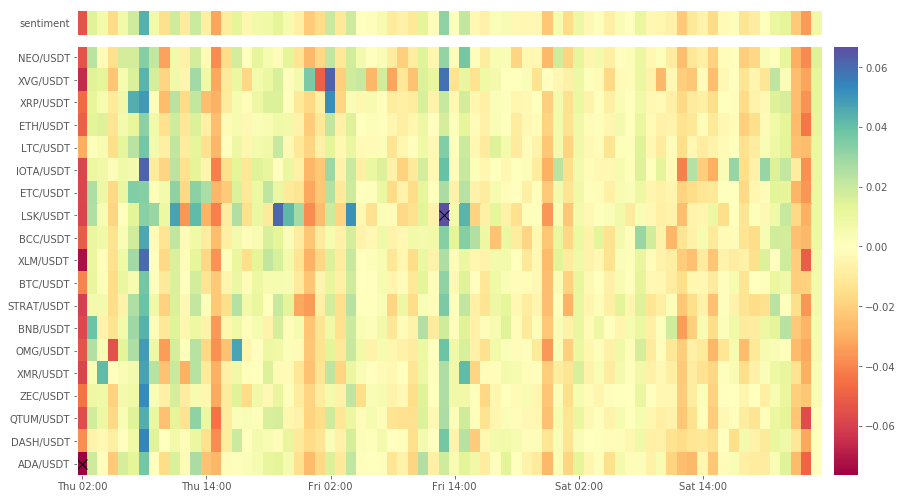

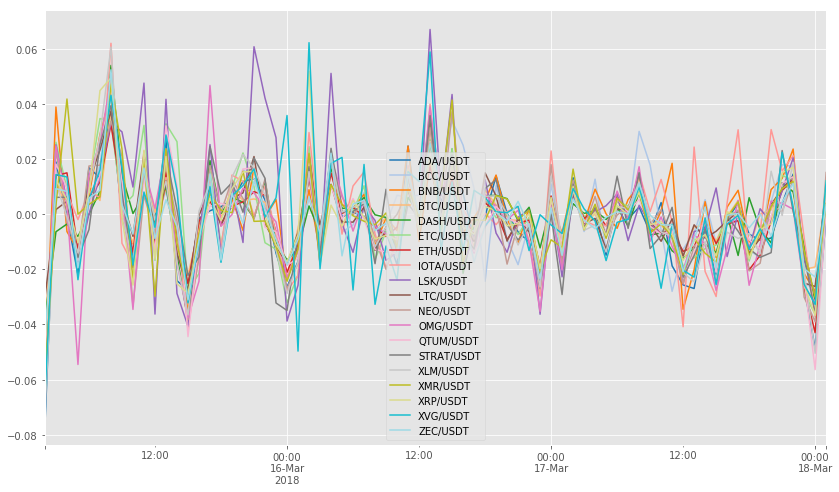

In [10]:
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

## volatility

In [11]:
df = utils.to_df(ohlc, 'C')
df = df.std() / df.mean()
df.sort_values()

BNB/USDT      0.116576
BTC/USDT      0.125581
ETH/USDT      0.125972
BCC/USDT      0.141591
XRP/USDT      0.149422
DASH/USDT     0.152804
LTC/USDT      0.158313
XMR/USDT      0.171624
XLM/USDT      0.178462
IOTA/USDT     0.179707
NEO/USDT      0.184110
OMG/USDT      0.189580
ZEC/USDT      0.190917
QTUM/USDT     0.208133
STRAT/USDT    0.208886
ADA/USDT      0.237532
XVG/USDT      0.254418
ETC/USDT      0.255801
LSK/USDT      0.288339
dtype: float64

    count     mean       std       min       25%       50%       75%       max
0  1368.0 -0.00386  0.073339 -0.301753 -0.044403 -0.004241  0.030322  0.401465


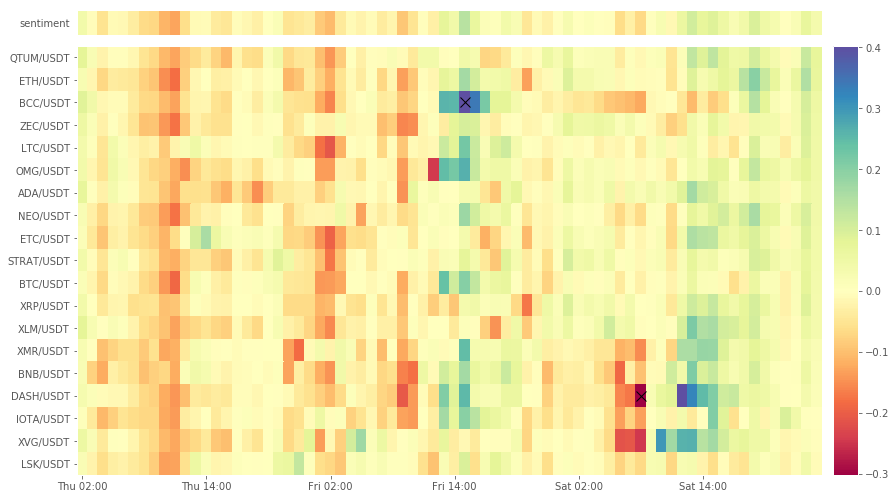

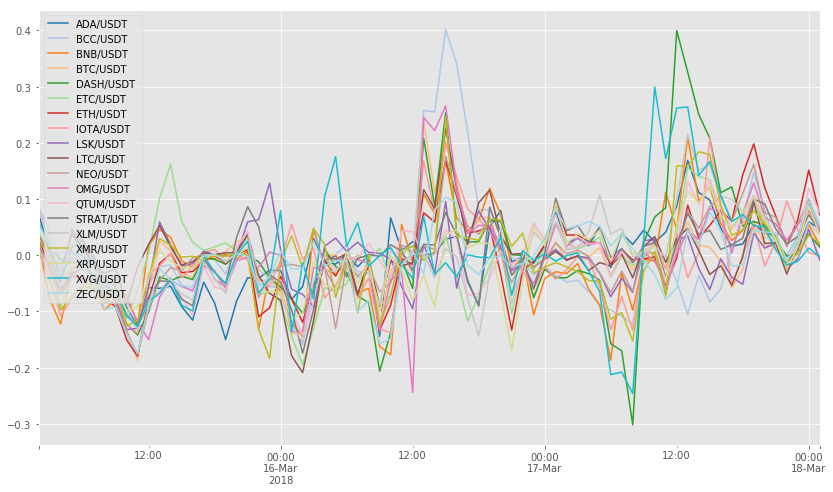

In [12]:
window = 20

df = utils.to_df(ohlc, 'C')
df = df.rolling(window).std()
df = df.pct_change().dropna()
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

## volume

    count     mean       std       min       25%       50%       75%       max
0  1368.0 -0.00379  0.284179 -0.722577 -0.191061 -0.070112  0.130332  0.865738


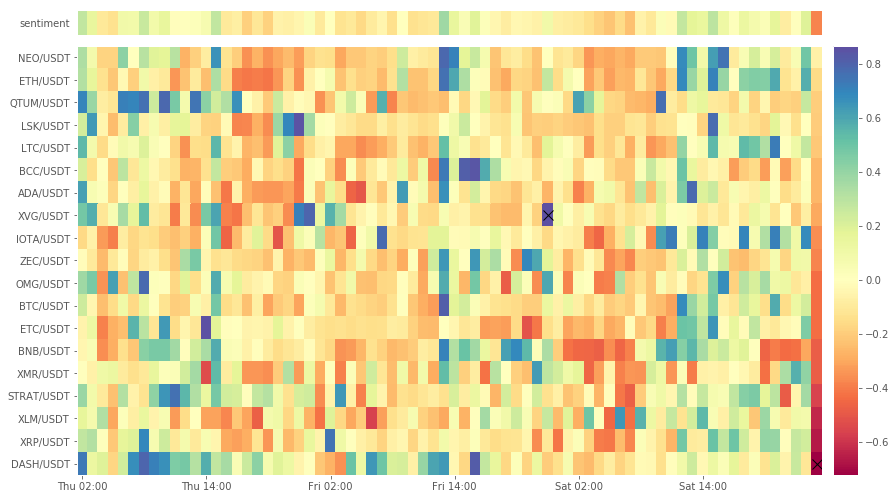

In [13]:
window = 20

df = utils.to_df(ohlc, 'V')
# volume relative to mean of previous volumes
df = utils.rolling_normalize(df, 'mean', window)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

# drawdown

## global

In [14]:
stats.dd.now(ohlc)

BNB/USDT      0.263910
BTC/USDT      0.344630
LTC/USDT      0.414168
BCC/USDT      0.430961
ETH/USDT      0.469379
XRP/USDT      0.495986
XMR/USDT      0.497416
DASH/USDT     0.499600
IOTA/USDT     0.502733
OMG/USDT      0.558420
ZEC/USDT      0.571320
XLM/USDT      0.592238
NEO/USDT      0.594993
QTUM/USDT     0.617085
STRAT/USDT    0.618813
ETC/USDT      0.635332
LSK/USDT      0.671439
XVG/USDT      0.704526
ADA/USDT      0.712425
dtype: float64

## local

    count      mean       std       min      25%       50%       75%       max
0  1368.0  0.069352  0.043007  0.007972  0.03765  0.059337  0.088457  0.247161


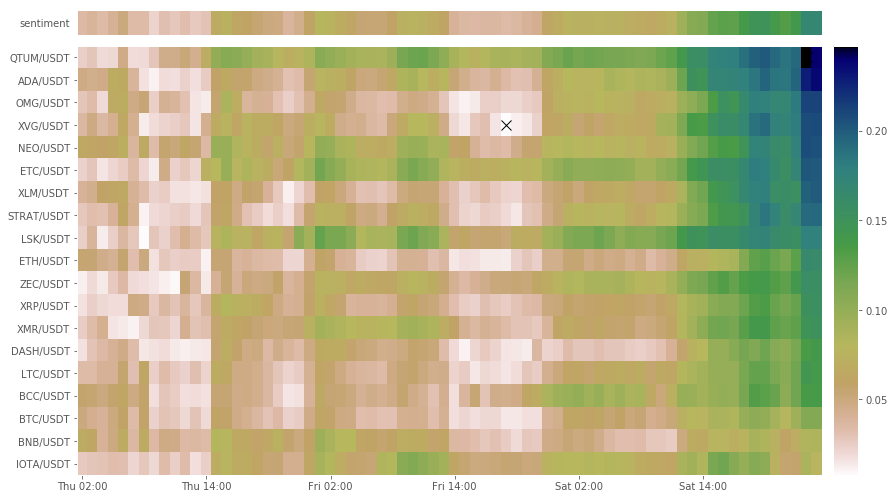

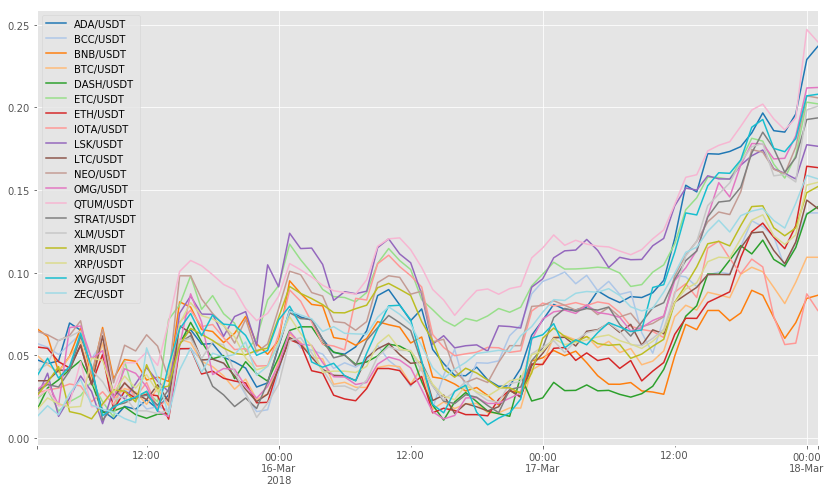

In [15]:
recent_ohlc = utils.cut(ohlc, display_window)
df = stats.dd.from_ohlc(recent_ohlc)

plot.evolution(df, plt.cm.gist_earth_r, rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

# correlation

    count      mean       std       min       25%       50%       75%  \
0  1080.0  0.854737  0.105045  0.291256  0.830142  0.885673  0.920186   

        max  
0  0.965169  


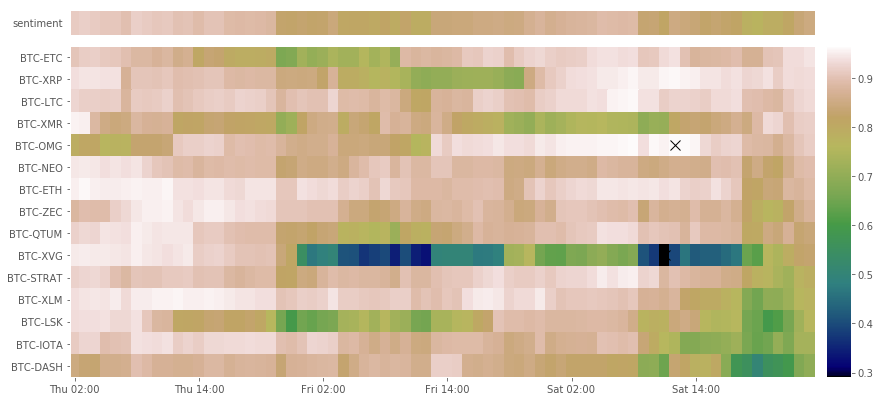

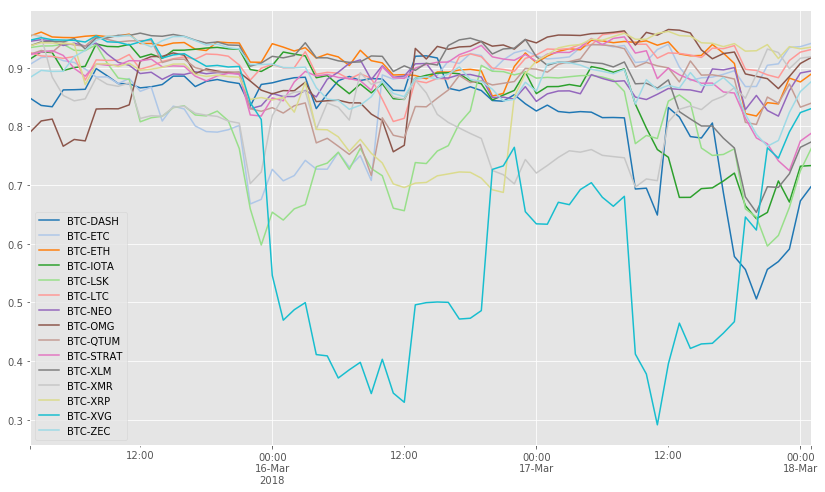

In [16]:
window = 20
base_pair = 'BTC/USDT'

df = utils.to_df(ohlc, 'C').pct_change().dropna()
df = stats.corr.rolling(df, window=window)
regex = re.compile(r'(%s-.+)' % base_pair)
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(/%s)' % base_pair.split('/')[1], '', x), df.columns))
df.dropna(inplace=True)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.gist_earth, rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

# anomaly detection

## price

    count      mean       std  min  25%  50%  75%  max
0  1368.0 -0.255848  0.847758 -3.0 -1.0  0.0 -0.0  3.0


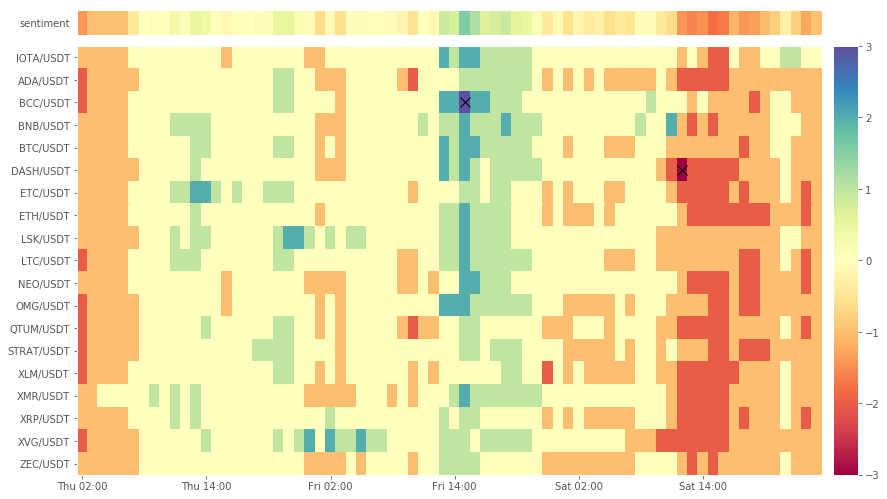

In [17]:
window = 20
levels = [1, 2, 3, 4, 5]

df = utils.to_df(ohlc, 'C')
df = utils.rolling_normalize(df, 'std', window)
df.dropna(inplace=True)
df = utils.classify(df, levels, bipolar=True)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

## volume

    count      mean       std  min  25%  50%  75%  max
0  1368.0  0.089181  0.786276 -3.0 -0.0 -0.0 -0.0  4.0


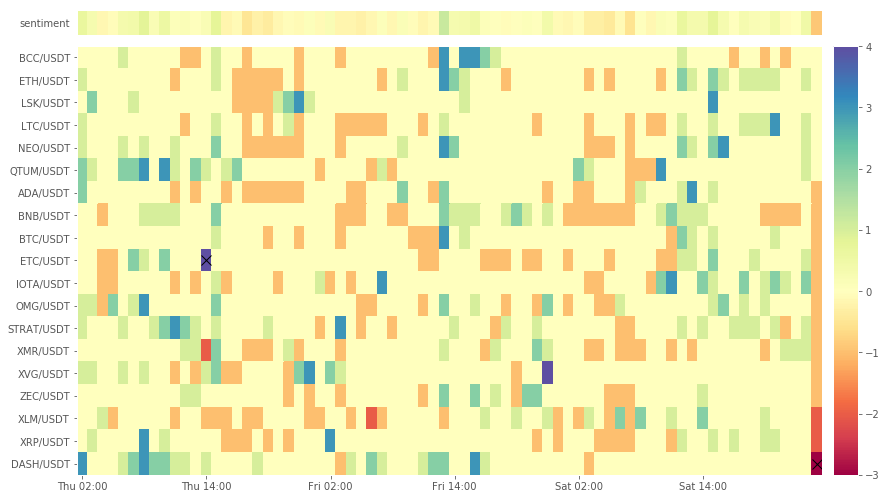

In [18]:
window = 20
levels = [1, 2, 3, 4, 5]

df = utils.to_df(ohlc, 'V')
df = utils.rolling_normalize(df, 'std', window)
df.dropna(inplace=True)
df = utils.classify(df, levels, bipolar=True)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

# oscillators

## *RSI*

In [19]:
def RSI(df, window):
    delta = df.diff().dropna()
    up, down = delta * 0, delta * 0
    pos_mask = delta > 0
    neg_mask = delta < 0
    up[pos_mask] = delta[pos_mask]
    down[neg_mask] = -delta[neg_mask]
    up.iloc[window - 1] = up.iloc[:window].mean()
    up = up.iloc[window - 1:]
    down.iloc[window - 1] = down.iloc[:window].mean()
    down = down.iloc[window - 1:]
    rs = up.ewm(com=window - 1, adjust=False).mean() / down.ewm(com=window - 1, adjust=False).mean()
    rsi = 100 - 100 / (1 + rs)
    return rsi.reindex(df.index)

    count      mean      std  min       25%       50%       75%  max
0  1368.0 -0.336429  0.38459 -1.0 -0.562325 -0.300575 -0.075883  1.0


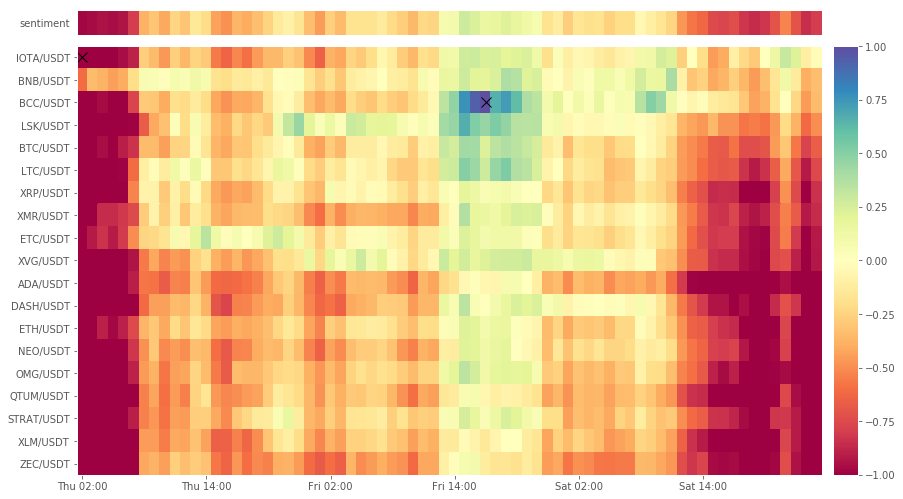

In [20]:
window = 20
oversold = 30
overbought = 70

df = utils.to_df(ohlc, 'C')
df = RSI(df, window)
df = utils.trunk(df, [oversold, overbought])
df = utils.rescale(df, [-1, 1])
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

## *CCI*

In [21]:
def cci(df, period):
    # (Typical Price  -  20-period SMA of TP) / (.015 x Mean Deviation)
    tp_sma = df.rolling(period).mean()
    md = df.rolling(period).apply(lambda a: np.fabs(a - a.mean()).mean())
    return (df - tp_sma) / (.015 * md)

    count      mean       std  min       25%       50%     75%       max
0  1368.0 -0.096544  0.323728 -1.0 -0.333766 -0.113898  0.1308  0.902858


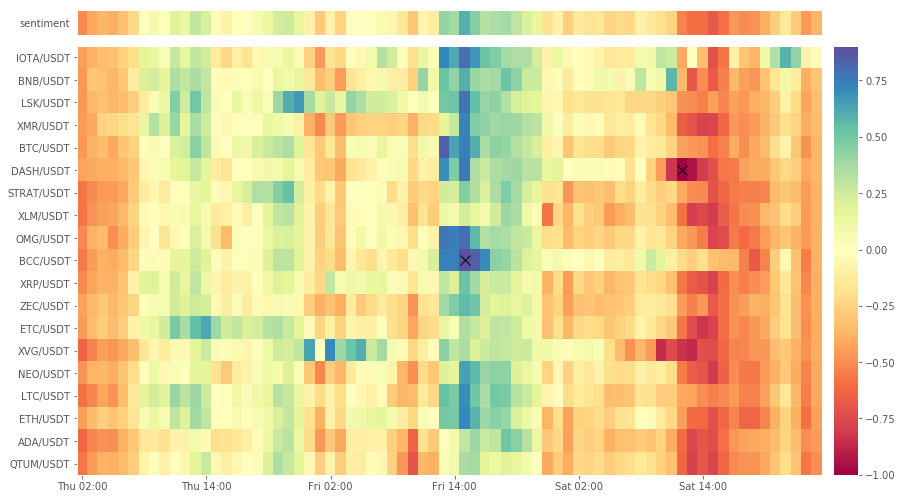

In [22]:
window = 20
oversold = -300
overbought = 300

df = utils.to_df(ohlc, 'C')
df = cci(df, window)
df = utils.trunk(df, [oversold, overbought])
df = utils.rescale(df, [-1, 1])
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

# signals

## *EMA crossover*

In [23]:
def ema_crossover(df, ema_fast, ema_slow):
    fast = df.ewm(span=ema_fast, adjust=False).mean()
    slow = df.ewm(span=ema_slow, adjust=False).mean()
    df = fast - slow
    df[df > 0] = 1
    df[df < 0] = -1
    df = df.fillna(0)
    df = df.diff().dropna()
    pos_mask = df == 2
    neg_mask = df == -2
    df[pos_mask] = 1
    df[neg_mask] = -1
    df[~neg_mask & ~pos_mask] = 0
    return df

    count      mean       std  min  25%  50%  75%  max
0  1368.0  0.000731  0.177356 -1.0  0.0  0.0  0.0  1.0


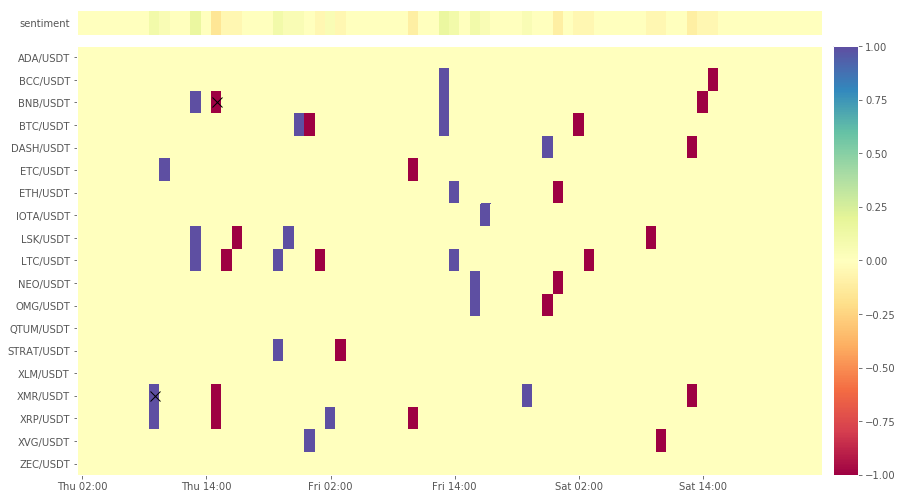

In [24]:
fast_window = 7
slow_window = 25

df = utils.to_df(ohlc, 'M')
df = ema_crossover(df, fast_window, slow_window)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

## *BollingerBand*

### How wide is the BB?

In [25]:
def BB(df, window, k):
    sma = df.rolling(window=window).mean()
    std = df.rolling(window=window).std()
    BOLU = sma + std * k
    BOLD = sma - std * k
    return BOLD, BOLU

def corridor(BOLD, BOLU):
    return BOLU - BOLD

    count      mean     std       min       25%       50%       75%      max
0  1368.0 -0.061802  0.4341 -0.749174 -0.438266 -0.154968  0.325947  0.78999


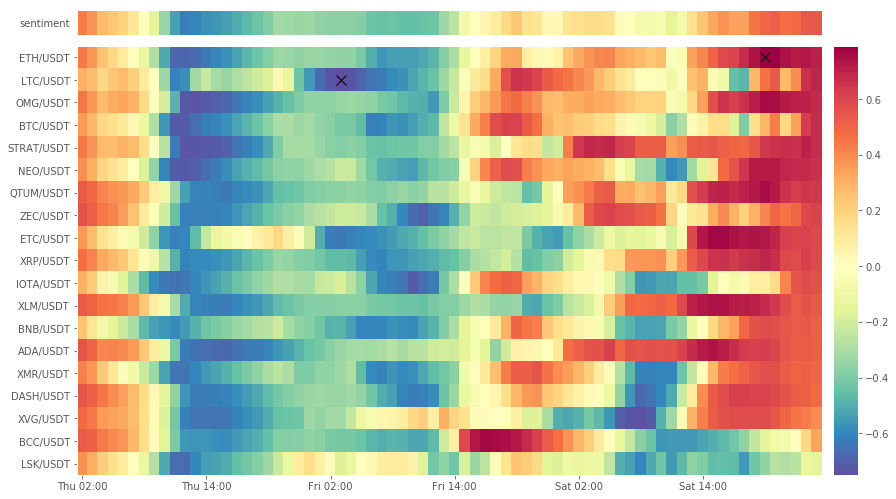

In [26]:
window = 20
k = 2

df = utils.to_df(ohlc, 'C')
df = corridor(*BB(df, window, k)).dropna()
df = utils.rolling_normalize(df, 'mean', window).dropna()
df1 = utils.cut_df(df, display_window)

plot.evolution(df1, plt.cm.Spectral_r, plot.midpoint_norm(0), rank='last')

### Does the price exceed the BB?

    count      mean      std       min       25%       50%       75%     max
0  1368.0 -0.189582  0.57623 -1.486033 -0.647587 -0.223237  0.221967  1.4991


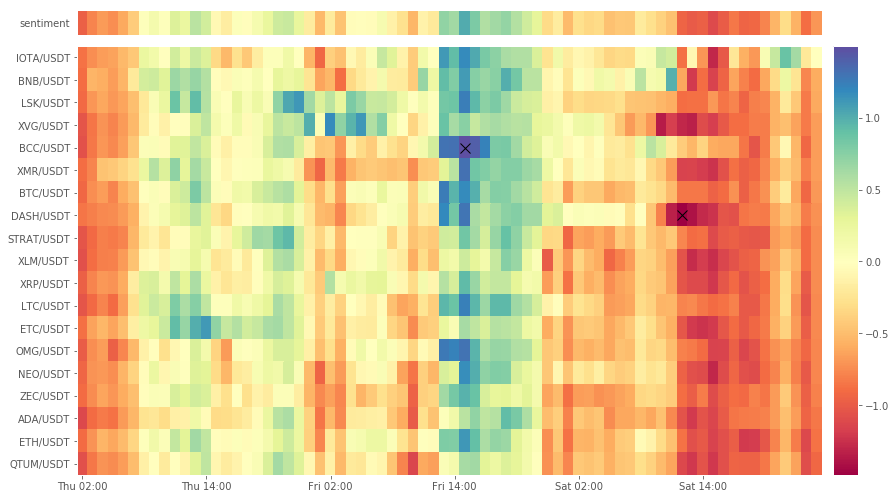

In [27]:
reload(utils)
df = utils.to_df(ohlc, 'C')
df = utils.range_rescale(df, BB(df, window, k), [-1, 1]).dropna()
df2 = utils.cut_df(df, display_window)

plot.evolution(df2, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')